<a href="https://colab.research.google.com/github/Arbaj-Wadagera/6thSem-ML-Lab/blob/main/1BM22CS051_Lab_8_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "train.csv"  # Update the file path to point to your .csv file
data = pd.read_csv(file_path)  # Use pd.read_csv() instead of pd.read_excel()

# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
data = data[features + [target]].copy()  # avoid SettingWithCopyWarning

# Handle missing values (future-safe syntax)
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Encode categorical features
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Split the dataset
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output results
print("Accuracy Score:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy Score: 0.8212290502793296
Confusion Matrix:
[[92 13]
 [19 55]]


In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = "iris.csv"  # Update the file path to point to your .csv file
iris_data = pd.read_csv(file_path)  # Use pd.read_csv() instead of pd.read_excel()

# Prepare features and target
X = iris_data.drop('species', axis=1)
y = iris_data['species']

# Encode species labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train with default n_estimators=10
rf_default = RandomForestClassifier(n_estimators=10, random_state=42)
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)
default_accuracy = accuracy_score(y_test, y_pred_default)

print("Accuracy with default n_estimators=10:", default_accuracy)

# Fine-tune by trying multiple values of n_estimators
best_score = 0
best_n = 10
for n in range(10, 110, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy with n_estimators={n}: {acc}")
    if acc > best_score:
        best_score = acc
        best_n = n

print(f"\nBest n_estimators: {best_n} with accuracy: {best_score}")


Accuracy with default n_estimators=10: 1.0
Accuracy with n_estimators=10: 1.0
Accuracy with n_estimators=20: 1.0
Accuracy with n_estimators=30: 1.0
Accuracy with n_estimators=40: 1.0
Accuracy with n_estimators=50: 1.0
Accuracy with n_estimators=60: 1.0
Accuracy with n_estimators=70: 1.0
Accuracy with n_estimators=80: 1.0
Accuracy with n_estimators=90: 1.0
Accuracy with n_estimators=100: 1.0

Best n_estimators: 10 with accuracy: 1.0


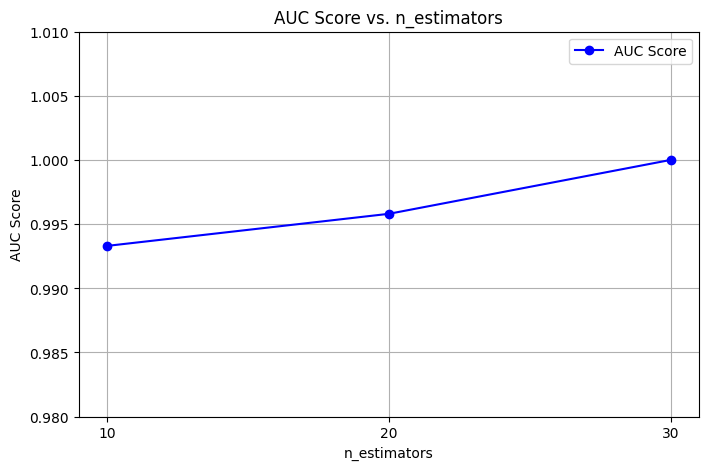

In [4]:
import matplotlib.pyplot as plt

# AUC scores for different n_estimators
n_estimators = [10, 20, 30]
auc_scores = [0.9933, 0.9958, 1.0]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(n_estimators, auc_scores, marker='o', linestyle='-', color='blue', label='AUC Score')
plt.title("AUC Score vs. n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("AUC Score")
plt.ylim(0.98, 1.01)  # Slightly above and below 1 for better visualization
plt.grid(True)
plt.xticks(n_estimators)
plt.legend()  # Add a legend for clarity
plt.show()
